<a href="https://colab.research.google.com/github/AmelTaouali/Dashboard/blob/main/Breast_Cancer_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importation des bibliothèques nécessaires


In [ ]:
# Importations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Scikit-learn et autres librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 2. Chargement du Dataset


In [ ]:
# Chargement du Dataset
csv_file_path = "wdbc.data"
column_names = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

data = pd.read_csv(csv_file_path, header=None, names=column_names)

# 3. Exploration initiale du Dataset

## 3.1 Dimensions du Dataset


In [ ]:
# Informations sur le dataset
print(f"Shape: {data.shape}")

Shape: (569, 32)


## 3.2 Détails des colonnes


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 3.3 Statistiques descriptives


In [ ]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# 4. Prétraitement des données


## 4.1 Transformation des étiquettes (M = 1, B = 0)


In [ ]:
labels = data['diagnosis'].map({'M': 1, 'B': 0})

## 4.2 Suppression des colonnes inutiles (id, diagnosis)

In [ ]:
data = data.drop(columns=['id', 'diagnosis'])

In [ ]:
data.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


# 5. Analyse exploratoire des données


## 5.1 Visualisation de la distribution des classes

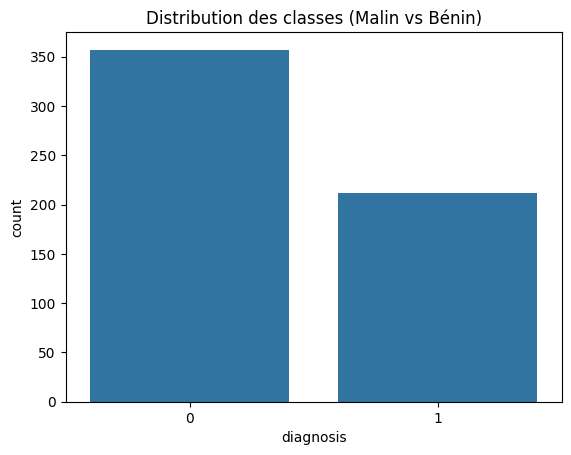

In [ ]:
# Visualisation de la distribution des classes
sns.countplot(x=labels)
plt.title("Distribution des classes (Malin vs Bénin)")
plt.show()

## 5.2 Vérification des valeurs manquantes et des doublons

In [ ]:
# Vérification des valeurs manquantes et doublons
print(f"Missing values:\n{data.isnull().sum()}")
print(f"Duplicated rows: {data.duplicated().sum()}")

Missing values:
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Duplicated rows: 0


## 5.3 Analyse des corrélations

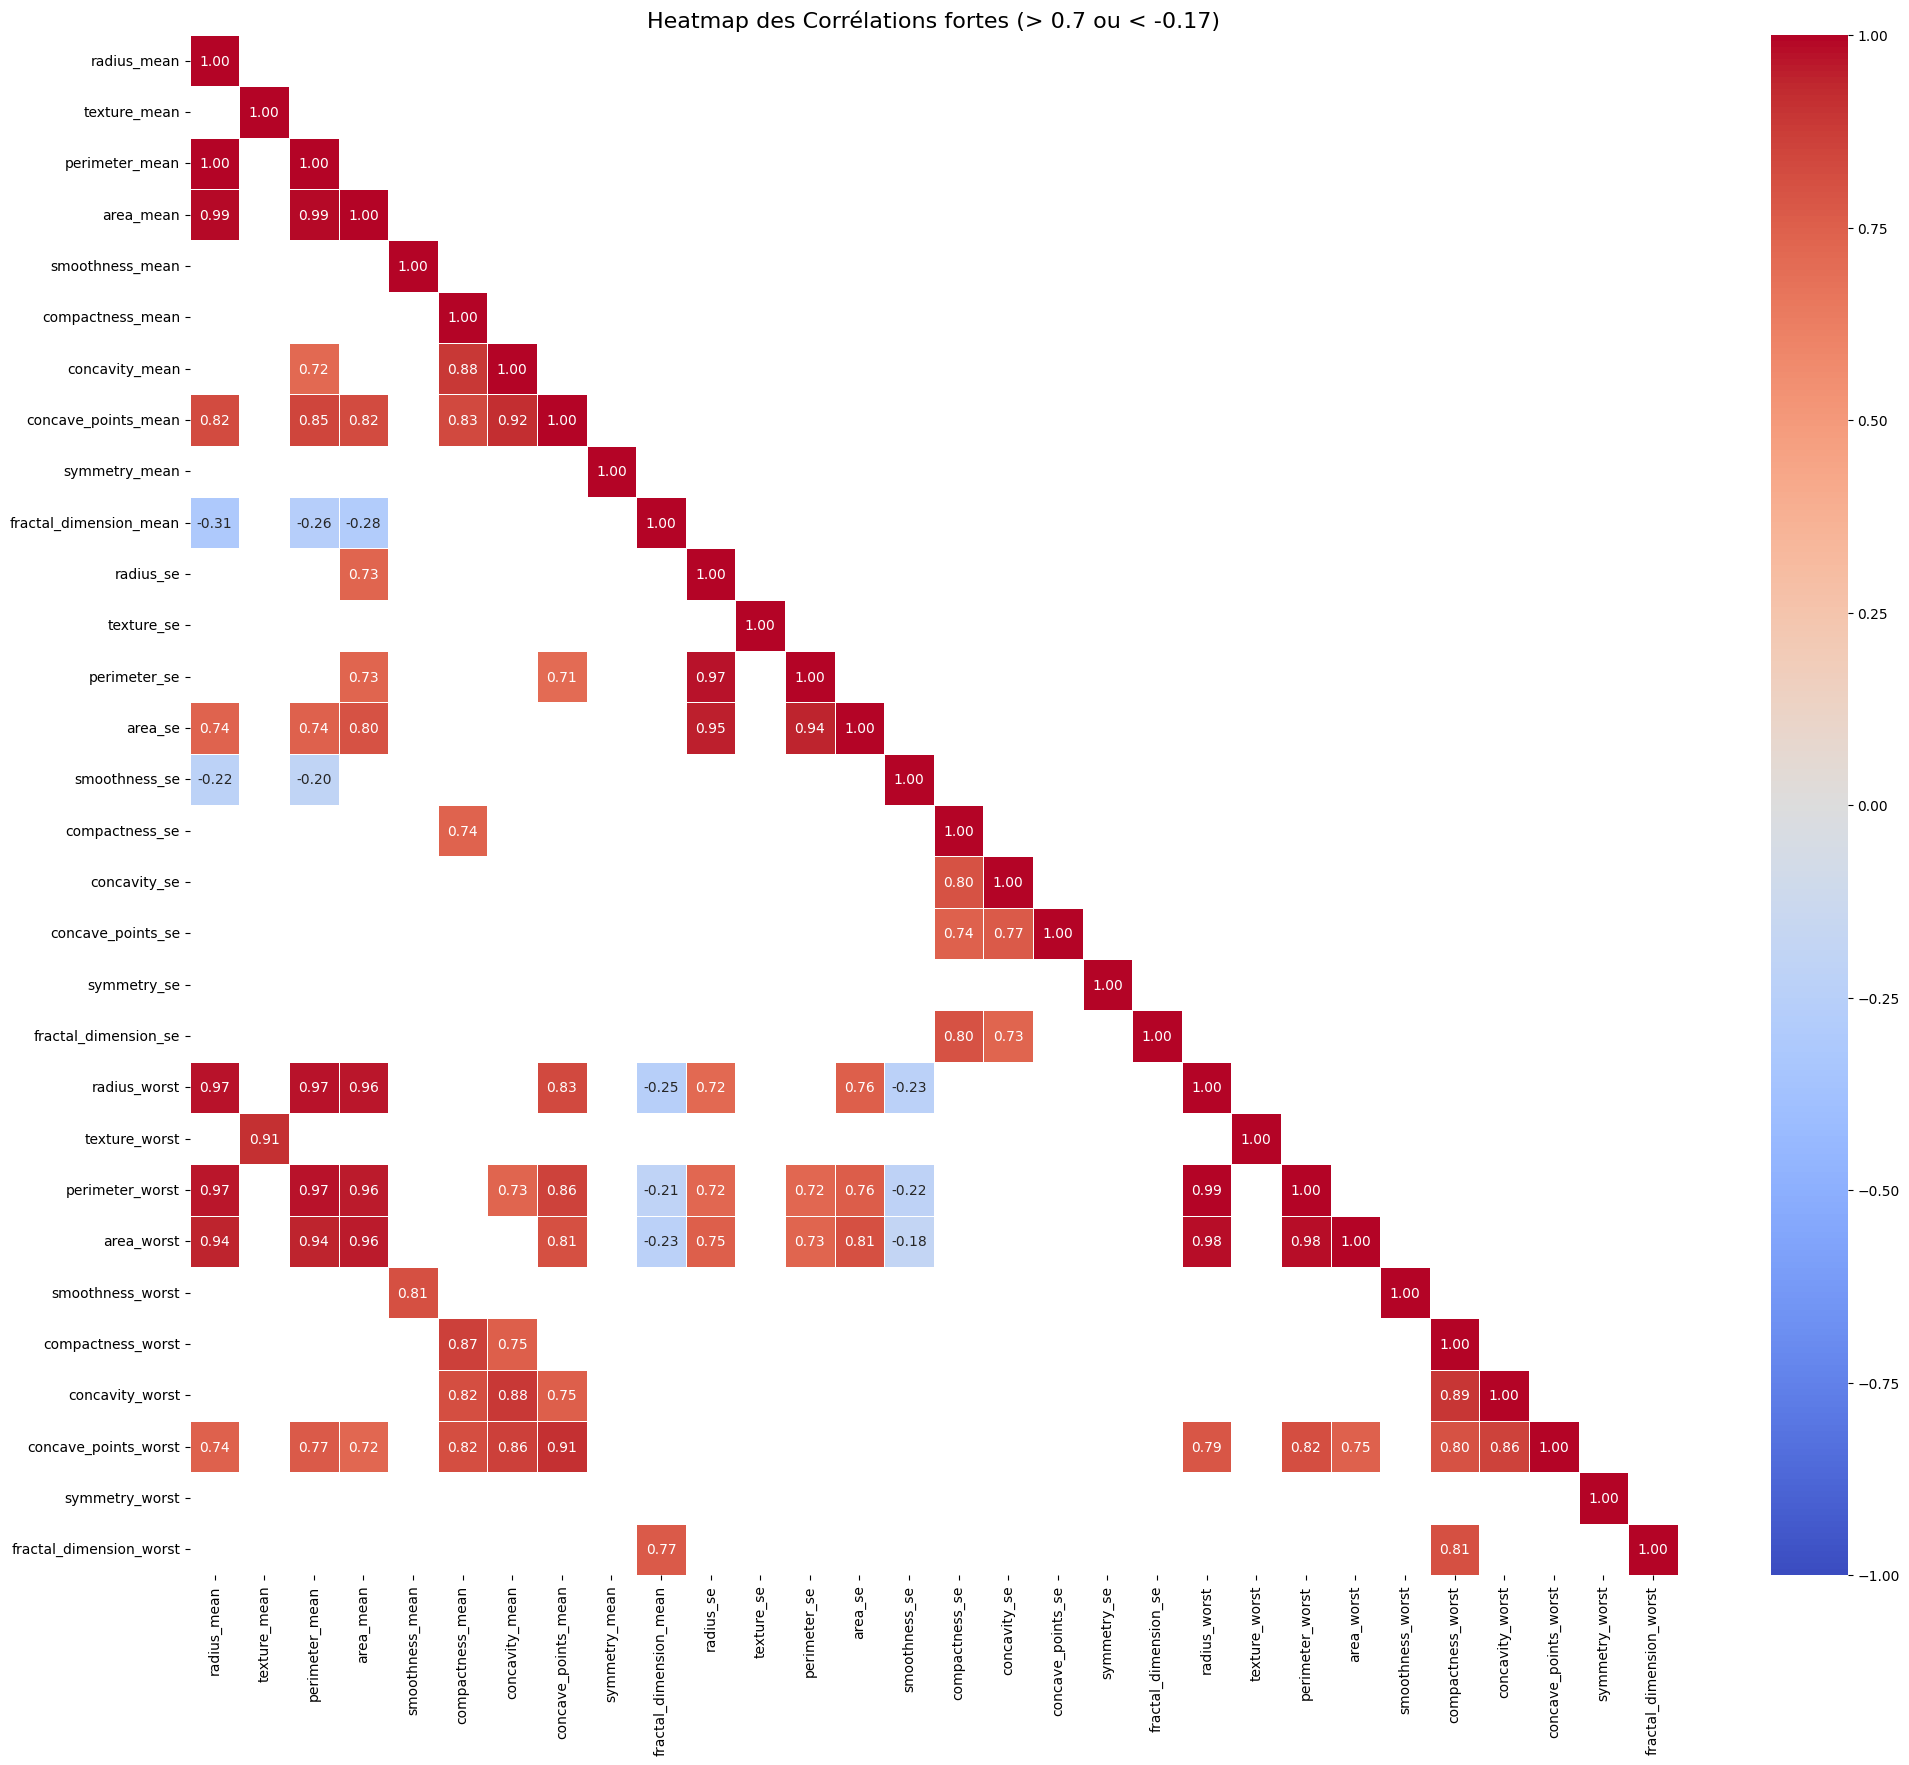

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Seuils pour les corrélations
threshold_pos = 0.7  # Corrélations positives supérieures à 0.7
threshold_neg = -0.17 # Corrélations négatives inférieures à -0.8

# Filtrer les corrélations qui ne répondent pas aux critères
filtered_corr = corr_matrix.copy()

# Remplacer les corrélations comprises entre 0.7 et -0.8 par NaN ( je vais pas les visualiser car il ne presente pas une correlation importante)
filtered_corr[(filtered_corr > threshold_neg) & (filtered_corr < threshold_pos)] = np.nan

# Masque pour cacher les valeurs NaN dans la heatmap
mask = np.isnan(filtered_corr)

# Masque pour cacher la moitié symétrique de la matrice (on masque la moitié inférieure)
mask_upper = np.triu(np.ones_like(filtered_corr, dtype=bool), k=1)  # La moitié supérieure

# Appliquer les deux masques (NaN et partie symétrique)
mask_combined = mask | mask_upper  # Combine les deux masques

# Affichage de la heatmap avec les masques
plt.figure(figsize=(24, 20))
sns.heatmap(filtered_corr, mask=mask_combined, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title(f"Heatmap des Corrélations fortes (> {threshold_pos} ou < {threshold_neg})", fontsize=16)
plt.show()


# 6. Préparation des données pour le Machine Learning

## 6.1 Séparation en ensembles d'entraînement et de test

- Sépare 80% pour entraînement, 20% pour test.

- stratify=labels ➔ Respecte la distribution des classes.

In [ ]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)


## 6.2 Traitement du déséquilibre des classes (SMOTE)

- SMOTE crée de nouvelles instances synthétiques pour équilibrer les classes.

In [ ]:
# Traitement des données déséquilibrées
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## 6.3 Normalisation des données

- Met les données sur une échelle comparable (moyenne = 0, écart-type = 1).

In [ ]:
# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Définition des modèles de Machine Learning

- Crée un dictionnaire avec plusieurs modèles machine learning :

        KNN, SVM, Arbre de décision, Bagging, Random Forest, Boosting, Stacking, Naive Bayes, Régression Logistique.

In [ ]:
# Définition des modèles
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Boosting": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        final_estimator=LogisticRegression()
    ),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),

}


# 8. Fonctions utilitaires pour l'entraînement et l'évaluation

* Définition des fonctions pour :
- Fonction pour entrainer un modele :
    - **compute_and_log_accuracy(model, X_train, y_train, X_test, y_test, results, name)**
    - returns : **y_pred**
- Fonction pour Plot Matrice de confusion pour un modele:
    - **plot_confusion_matrix(y_test, y_pred, name)**
- Fonction pour calculer et afficher les metriques d'évaluation ( precision , recall , f1-Score) pour un  modele ) :
    - **plot_classification_reporty_test, y_pred, results, name**
- Fonction pour afficher le ROC curve pour un modele :
    - **plot_roc_curve(y_test, model, results, name)**


## 8.1 Fonction pour entraîner un modèle et calculer la précision

In [ ]:
def compute_and_log_accuracy(model, X_train, y_train, X_test, y_test, results, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': acc}  # Ajouter l'accuracy

    return y_pred

## 8.2 Fonction pour afficher la matrice de confusion

In [ ]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_test, y_pred, name):
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()


## 8.3 Fonction pour afficher le rapport de classification

In [ ]:
# Fonction pour calculer et afficher le rapport de classification
def plot_classification_report(y_test, y_pred, results, name):
    report = classification_report(y_test, y_pred, output_dict=True)

    # Stocker les valeurs dans 'results'
    weighted_avg = report['weighted avg']
    results[name]['precision'] = weighted_avg['precision']
    results[name]['recall'] = weighted_avg['recall']
    results[name]['f1-score'] = weighted_avg['f1-score']

    # Affichage dans un DataFrame
    report_df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Value': [weighted_avg['precision'], weighted_avg['recall'], weighted_avg['f1-score']]
    })

    # Affichage du barplot horizontal
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x='Value', y='Metric', data=report_df, orient='h')
    plt.title(f"Rapport de classification - {name}")
    plt.xlim(0, 1)

    # Ajouter les valeurs sur les barres
    for index, value in enumerate(report_df['Value']):
        ax.text(value + 0.02, index, f'{value:.2f}', va='center', ha='left', fontsize=12)

    plt.show()

## 8.4 Fonction pour tracer la courbe ROC

In [ ]:
# Fonction pour calculer et afficher la courbe ROC
def plot_roc_curve(y_test, model, results, name):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Stocker les valeurs ROC dans 'results'
    results[name]['roc_auc'] = roc_auc
    results[name]['fpr'] = fpr.tolist()  # Convertir en liste pour le stockage
    results[name]['tpr'] = tpr.tolist()  # Convertir en liste pour le stockage
    results[name]['thresholds'] = thresholds.tolist()  # Convertir en liste pour le stockage

    # Affichage de la courbe ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

## 8.5 Fonction pour afficher l'arbre de décision (optionnel)


In [ ]:
# Fonction pour afficher l'arbre de décision
def plot_decision_tree(model, data, name):
    if name == "Decision Tree":
        plt.figure(figsize=(20, 10))
        plot_tree(model, filled=True, feature_names=data.columns, class_names=["Benign", "Malignant"], max_depth=3)
        plt.title("Visualisation de l'Arbre de Décision (3 niveaux)")
        plt.show()

# 9. Entraînement et évaluation des modèles

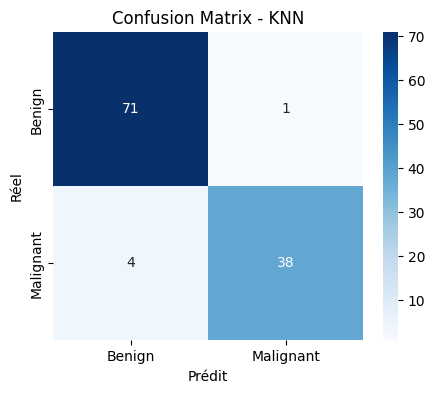

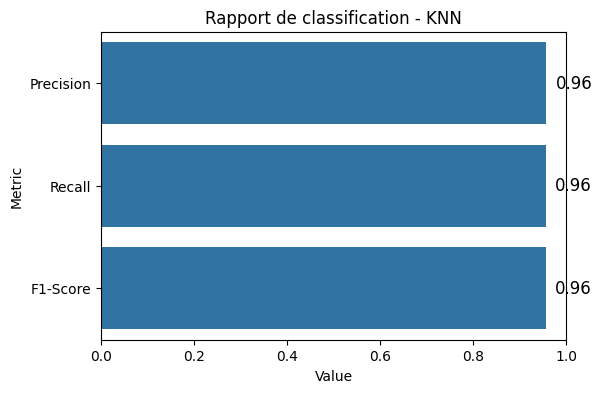

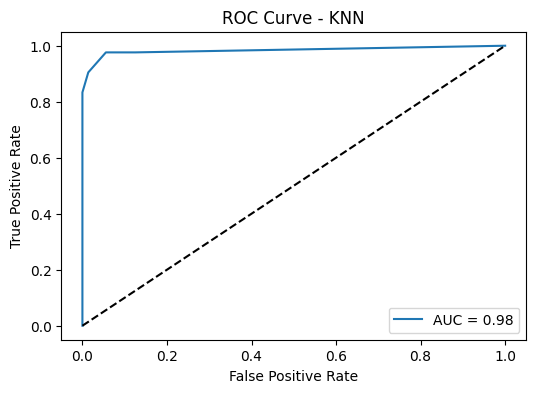

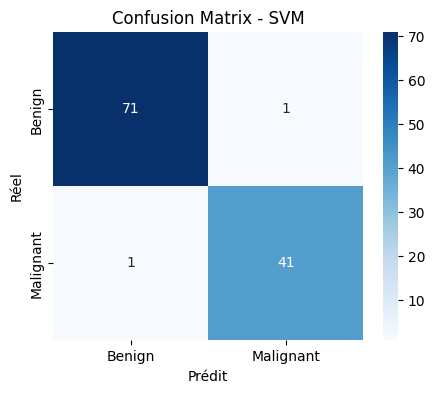

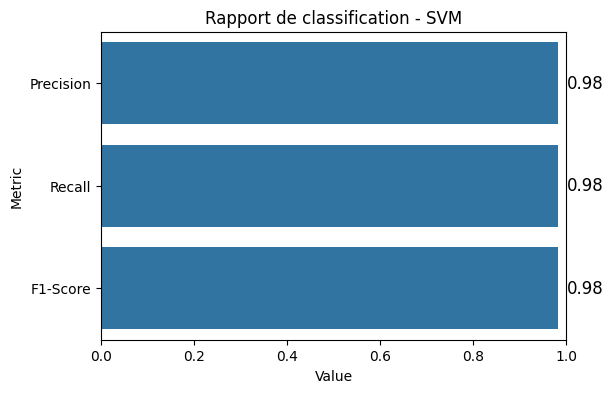

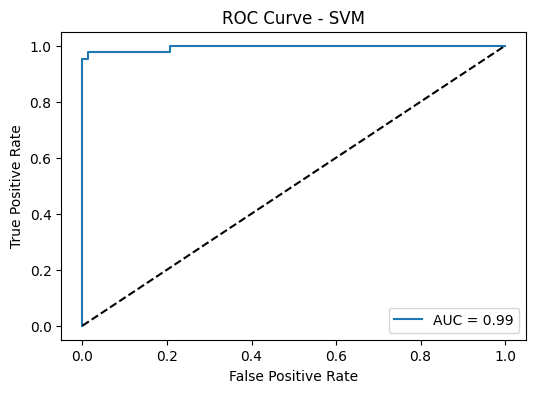

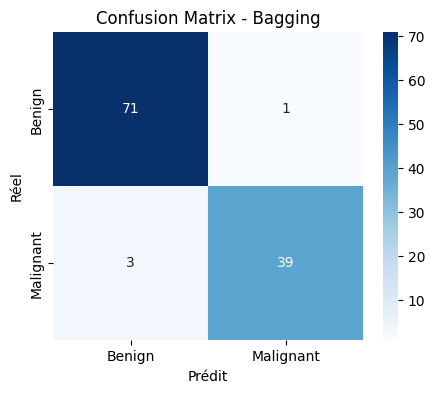

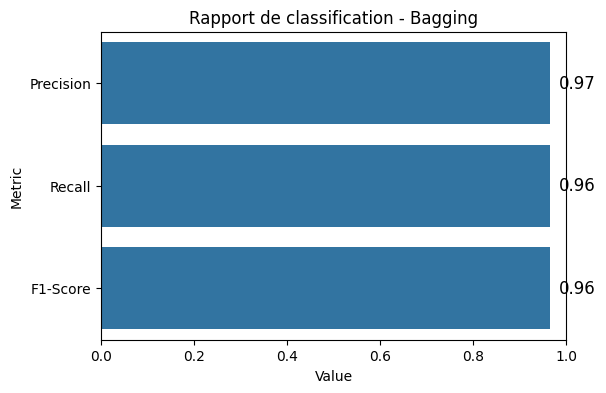

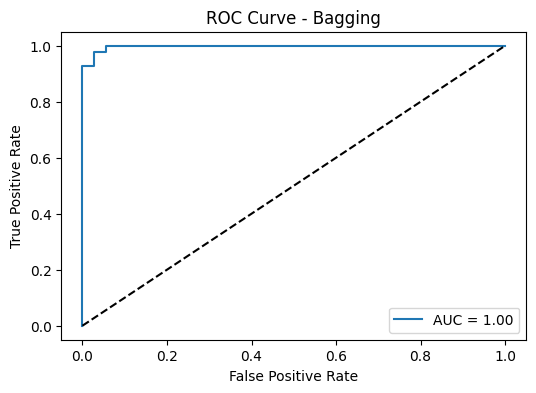

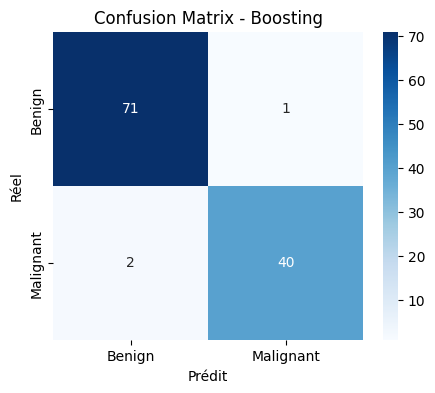

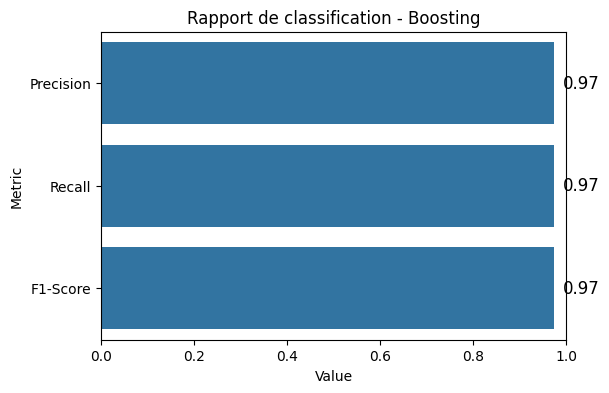

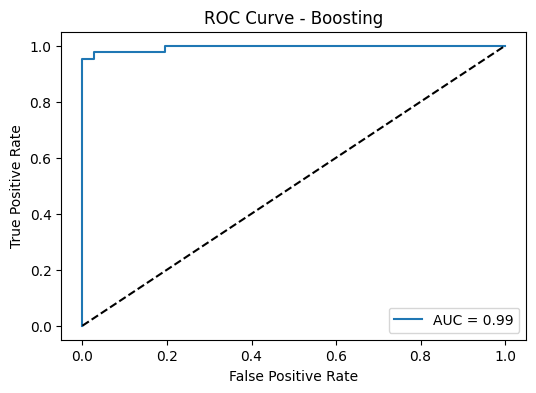

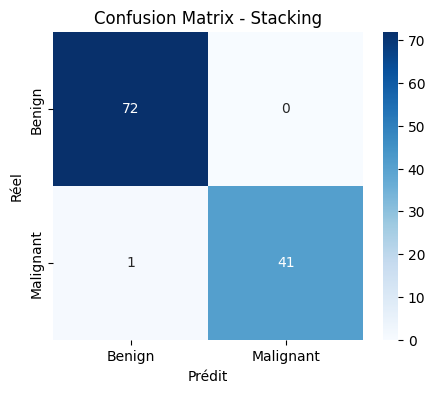

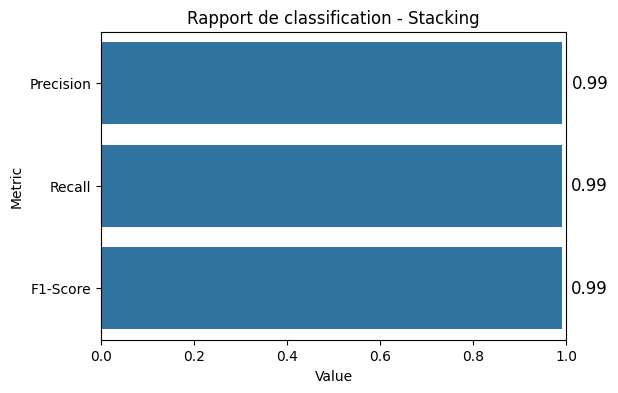

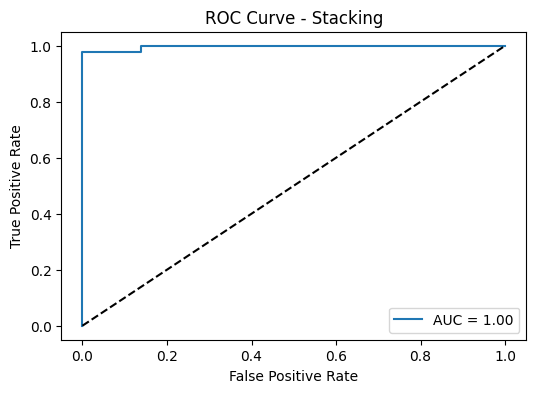

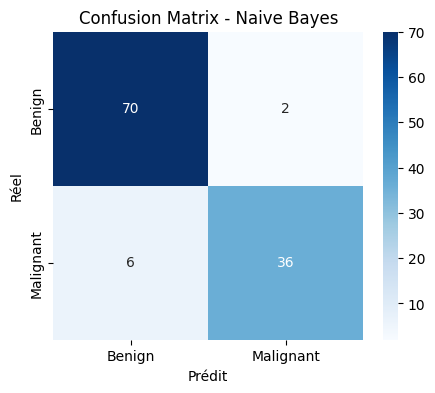

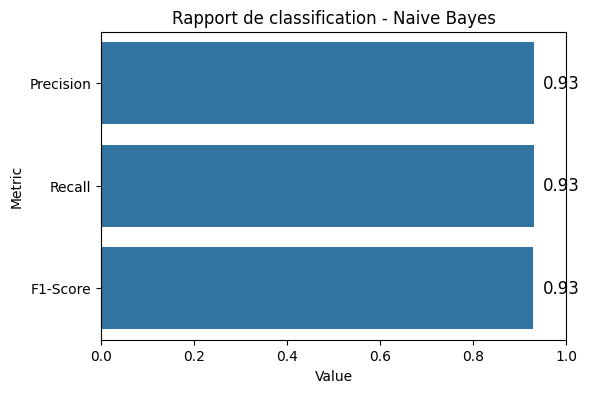

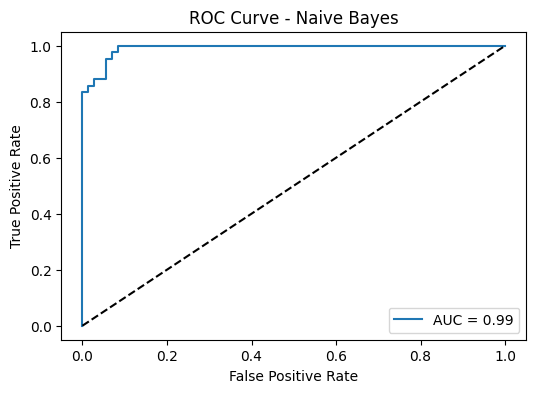

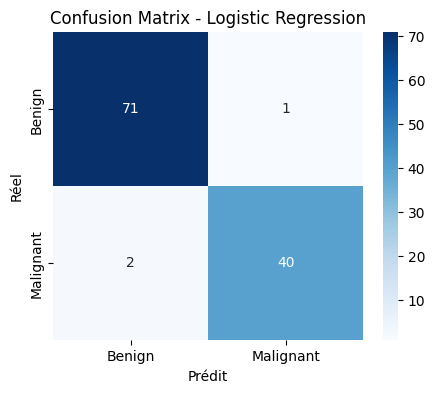

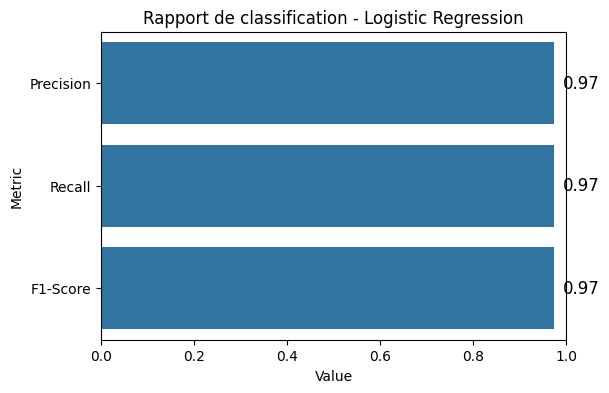

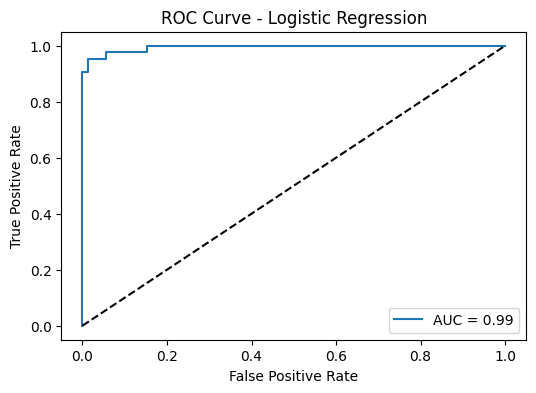

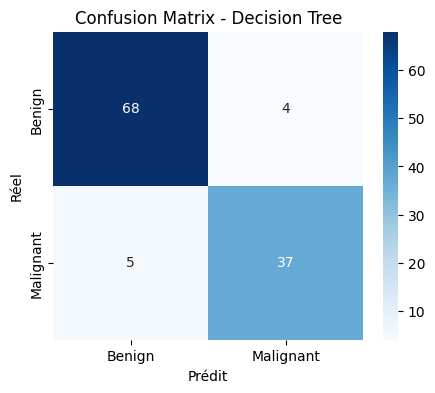

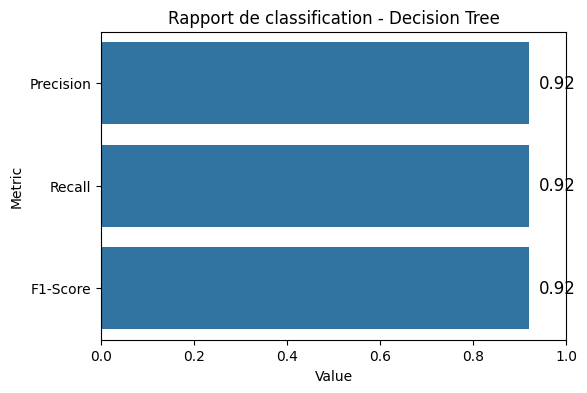

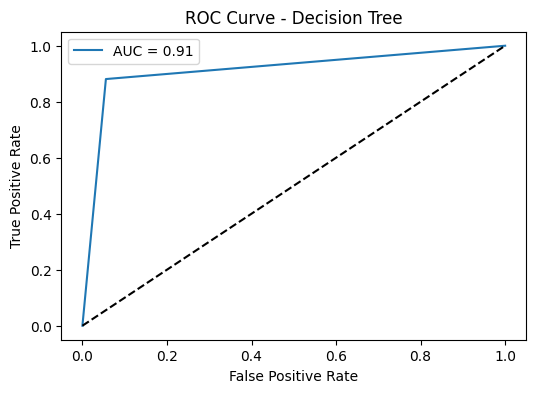

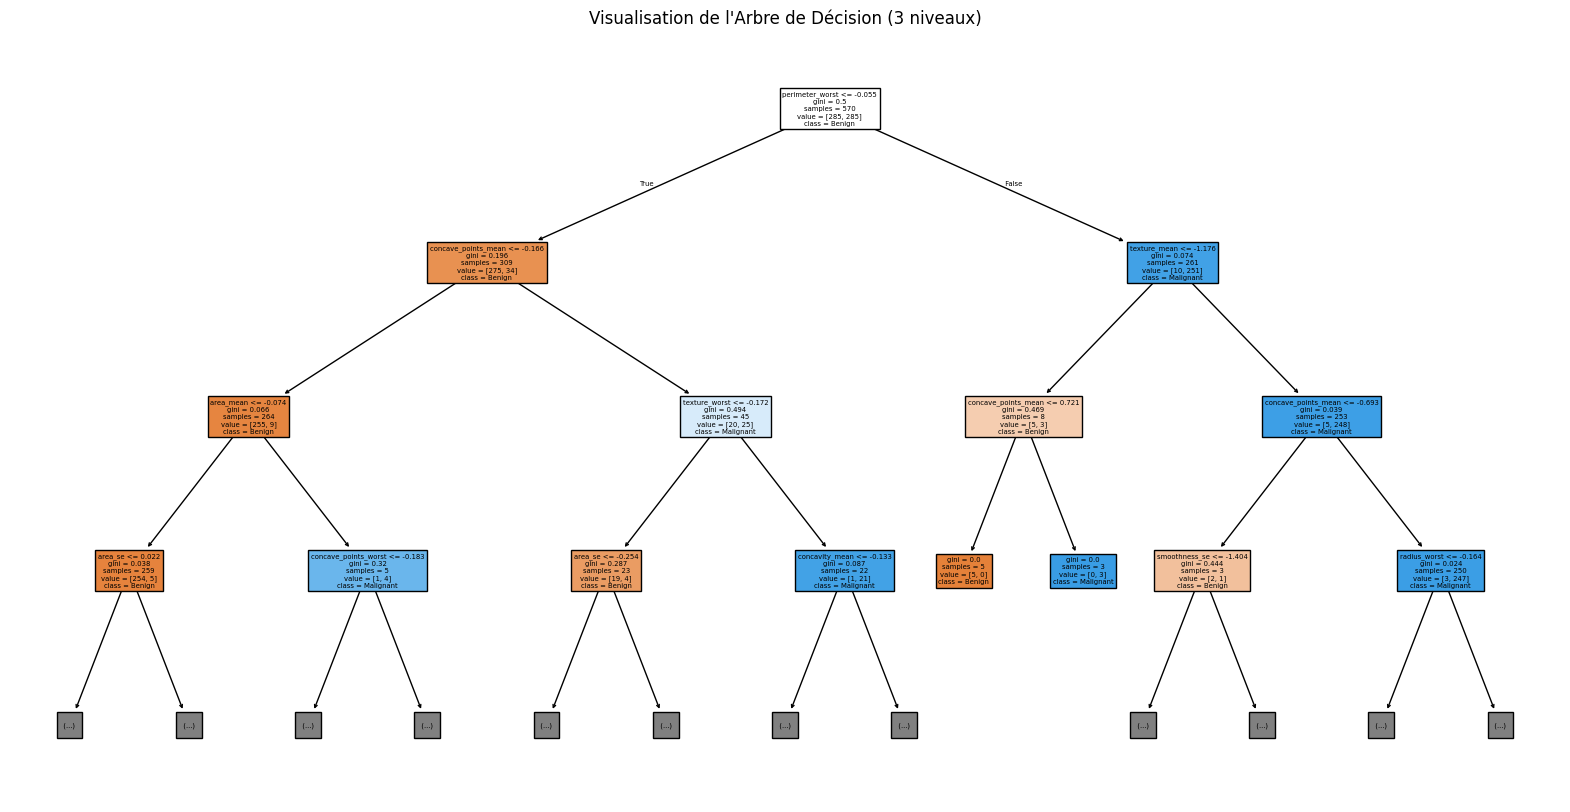

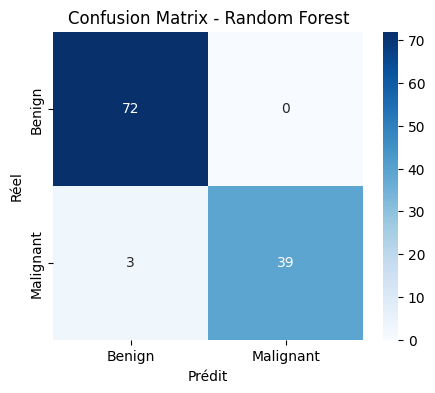

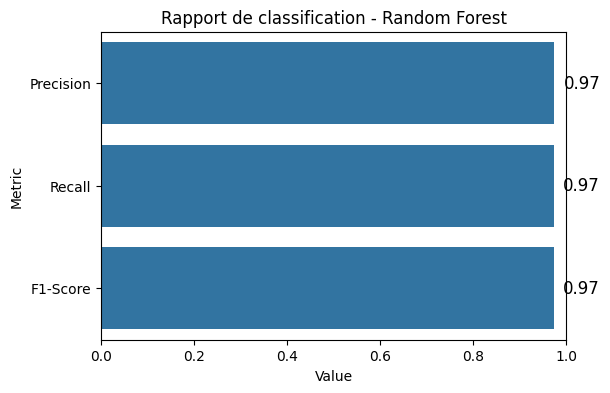

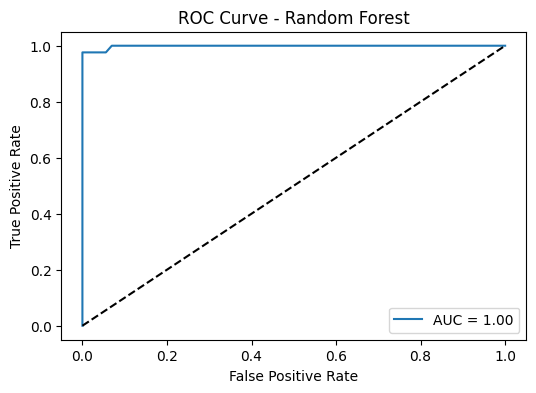

In [ ]:
results = {}  # Dictionnaire pour stocker les résultats

for name, model in models.items():
    logging.info(f"Training {name}...")

    # Entraînement et évaluation du modèle
    y_pred = compute_and_log_accuracy(model, X_train, y_train, X_test, y_test, results, name)

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Rapport de classification
    plot_classification_report(y_test, y_pred, results, name)

    # Courbe ROC
    plot_roc_curve(y_test, model, results, name)

    # Affichage de l'arbre de décision
    plot_decision_tree(model, data, name)

# 10. Fonctions utilitaires pour la Comparaison des performances des modèles

## 10.1 Fonction pour afficher tous les ROC des modeles

In [ ]:
def plot_all_roc_curves(results):
    plt.figure(figsize=(8, 6))

    for name, metrics in results.items():
        fpr = metrics['fpr']
        tpr = metrics['tpr']
        roc_auc = metrics['roc_auc']

        # Tracer la courbe ROC pour chaque modèle
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    # Ajouter la diagonale représentant un modèle aléatoire
    plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.50)')

    # Ajouter les titres, labels et légende
    plt.title("Courbes ROC de tous les modèles", fontsize=16)
    plt.xlabel('Taux de faux positifs (FPR)', fontsize=14)
    plt.ylabel('Taux de vrais positifs (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## 10.2 Fonction pour afficher les graphes des metriques d'evaluation

In [ ]:
def plot_metric_barplot(results, metric):
    if not all(metric in model_results for model_results in results.values()):
        raise ValueError(f"La métrique '{metric}' n'existe pas dans tous les modèles.")

    # Préparer les données
    df = pd.DataFrame({
        'Model': list(results.keys()),
        'Value': [model_results[metric] for model_results in results.values()]
    })

    # Trier par ordre décroissant
    df = df.sort_values('Value', ascending=False)

    # Définir une palette de couleurs unique
    palette = sns.color_palette("Set2", len(df['Model']))
    model_to_color = dict(zip(df['Model'], palette))

    # Ajouter la colonne 'Color' pour seaborn
    df['Color'] = df['Model']

    # Tracer le barplot en utilisant hue
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x='Value',
        y='Model',
        hue='Model',
        data=df,
        dodge=False,
        palette=model_to_color,
        legend=False  # Pas besoin d'afficher la légende
    )

    plt.title(f'Comparaison des {metric.capitalize()}s', fontsize=16)
    plt.xlim(0, 1)

    # Ajouter les annotations sur les barres
    for index, value in enumerate(df['Value']):
        ax.text(value + 0.02, index, f'{value:.4f}', va='center', ha='left', fontsize=12)

    plt.xlabel(metric.capitalize(), fontsize=14)
    plt.ylabel('Modèles', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# 11. Comparaison des performances des modèles

## 11.1 Affiche toutes les courbes ROC pour plusieurs modèles sur un même graphique

(Receiver Operating Characteristic Curve)

ROC est une Courbe qui trace :

- sur Axe X : Taux de Faux Positifs (FPR = FP / (FP+VN))

- sur Axe Y : Taux de Vrai Positifs (Recall)

**Interprétation : Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle.**

AUC (Area Under the Curve) :

- Aire sous la courbe ROC.

- AUC = 1 : Parfait.

- AUC = 0.5 : Modèle aléatoire (mauvais).

**Plus AUC est grand, mieux c’est.**

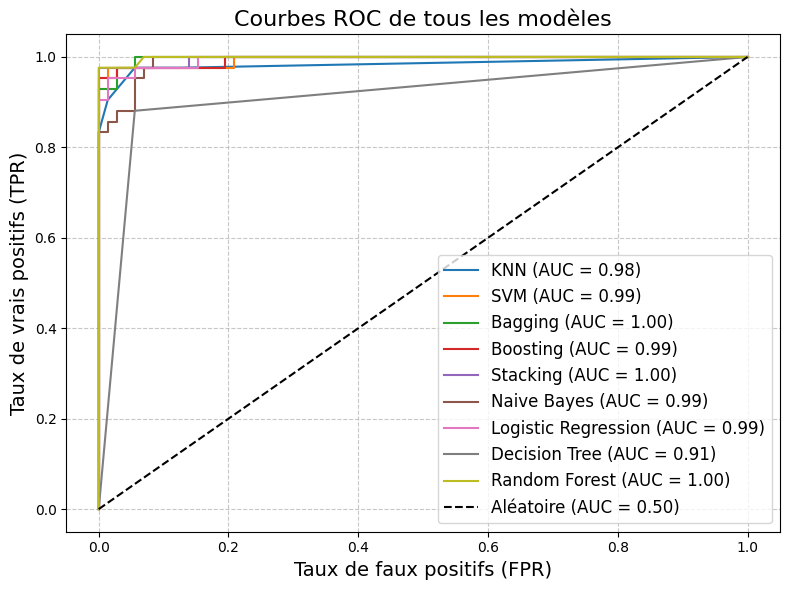

In [ ]:
plot_all_roc_curves(results)

## 11.2 Comparaison entre les Accuracys des modeles

- La proportion de prédictions correctes :
  ![image.png](attachment:ead9e3ba-4d9f-45c4-9df1-5b8f1ec74c69.png)


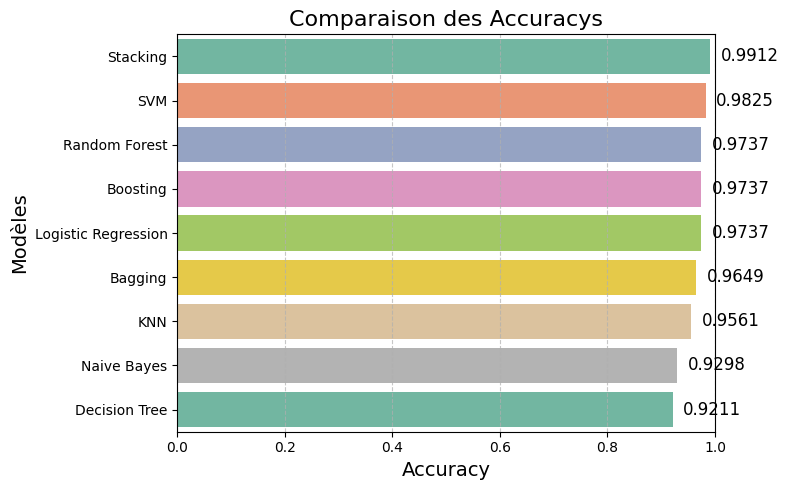

In [ ]:
plot_metric_barplot(results, 'accuracy')

## 11.3 Comparaison entre les Precisions des modeles

- Parmi toutes les prédictions positives, combien sont correctes ?
    ![image.png](attachment:81d5d056-0bb7-4076-9b86-127b7c8f229e.png)

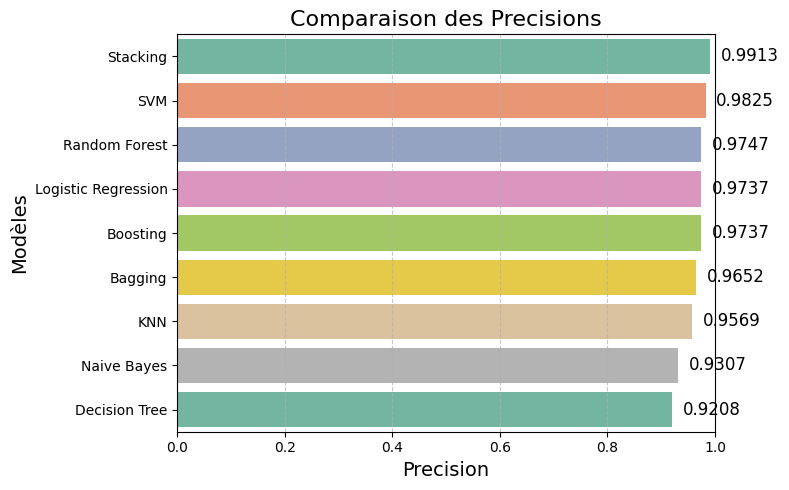

In [ ]:
plot_metric_barplot(results, 'precision')

## 11.4 Comparaison entre les Recalls des modeles

- Parmi tous les vrais positifs, combien ont été correctement prédits ?
      ![image.png](attachment:dccee746-bc4f-4b9a-9dc6-f3a8c0f36865.png)


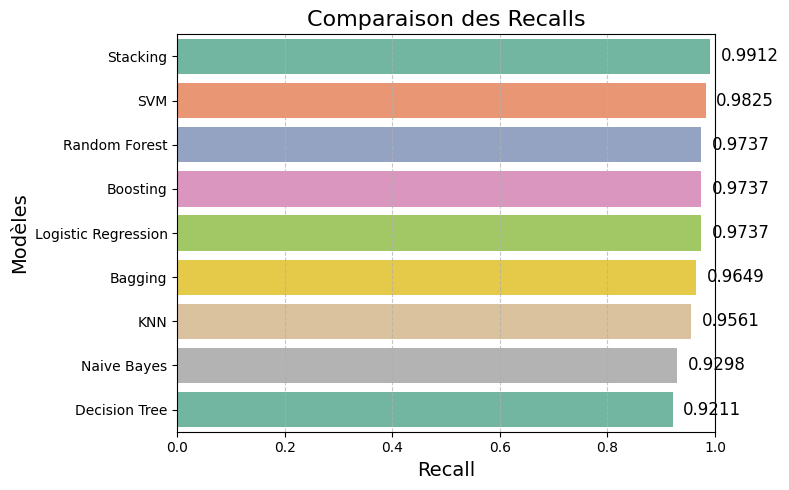

In [ ]:
plot_metric_barplot(results, 'recall')

## 11.5 Comparaison entre les F1-Scores des modeles

- Est le moyenne harmonique entre Precision et Recall .
- Le F1-Score mesure l'équilibre entre : Precision & Recall .


F1-Score :

- Est élevé => si Precision ET Recall sont tous les deux bons.

- Est Bas => si l'un des deux est faible.

F1-Score :
    ![image.png](attachment:59648e1f-5919-4382-8ec1-ff2d25ee32a5.png)

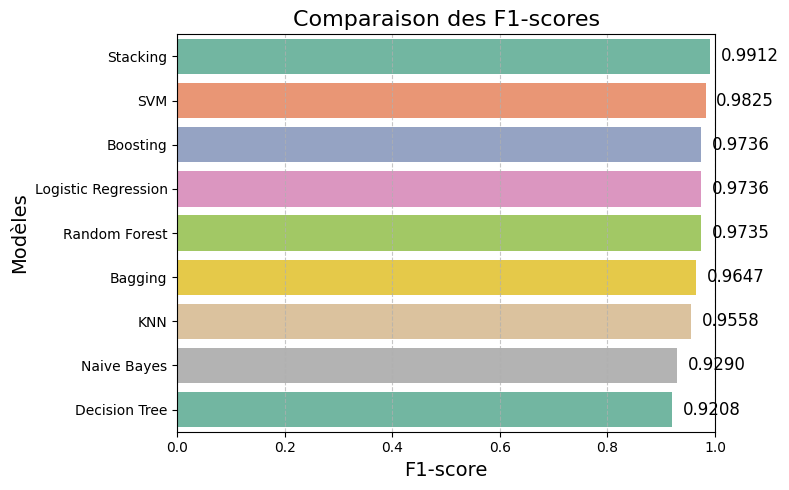

In [ ]:
plot_metric_barplot(results, 'f1-score')

# 12. Analyse de l'importance des caractéristiques


- Avec le modèle Random Forest :

    -Affiche quelles caractéristiques ont le plus influencé la décision.

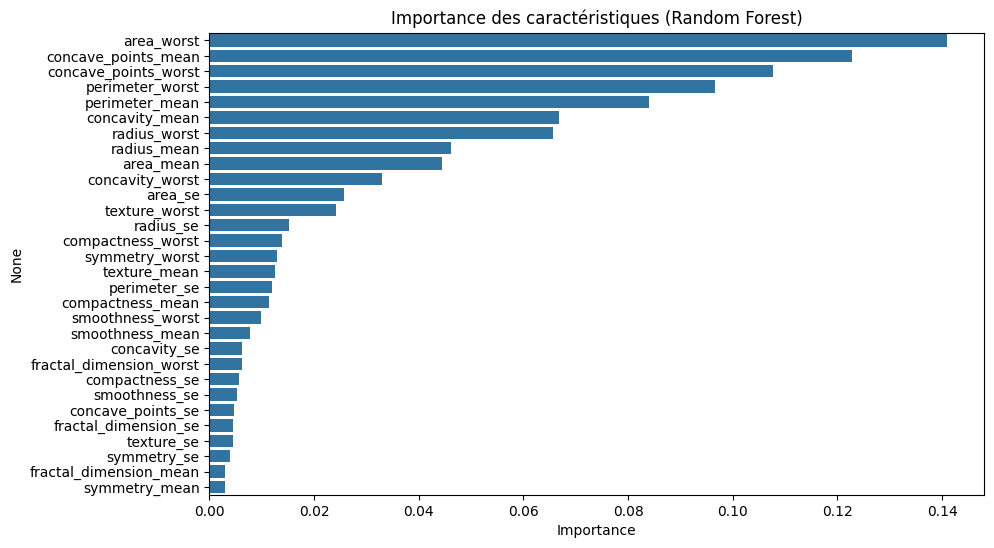

In [ ]:
# Importance des variables (Random Forest)
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=data.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importance des caractéristiques (Random Forest)")
plt.xlabel("Importance")
plt.show()